<a href="https://colab.research.google.com/github/fredcatameo/DATA606_FinalProject/blob/dev/DATA606_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATA 606 Project Final Report

# Leveling up Learning: An Analysis of the Effects of Gamification

### Ferdinand (Fred) Catameo, Cancan Chen, David Errington, Paul Lin, Kelly Wu - Team L02-04

# Content
- [Background](#background_intro)
- [Data Selection](#dataset)
- [Preliminary Data Analysis](#preliminary_eda)
- [Analysis Questions](#analysis_questions)
- [Class Function Definitions and Data Preprocessing](#code_class_definitions)
  
- [Q1 How does gamification affect users’ learning performance?](#Q1)
    - [Q1.0 Data Preparation](#Q1.0)
    - [Q1.1 Is There a Significant Difference in Objective Scores Between the Groups?](#Q1.1)
        - [Q1.1.1 Normal Distribution & Variance Assumption Test](#Q1.1.1)
            - [Q1.1.1.1 Normality Test with Shapiro-Wilk Test](#Q1.1.1.1)
            - [Q1.1.1.2 Variance Test with Levene Test](#Q1.1.1.2)
        - [Q1.1.2 Test for Mean Difference](#Q1.1.2)
            - [Q1.1.2.1 T-Test](#Q1.1.2.1)
            - [Q1.1.2.2 Conclusion for Objective Score](#Q1.1.2.2)
            - [Q1.1.2.3 Population Estimation](#Q1.1.2.3)
        - [Q1.1.3 Conclusion for Objective Score](#Q1.1.3)
    - [Q1.2 Is there a statistically significant difference in perceptions after learning between the two groups?](#Q1.2)
        - [Q1.2.1 Normal Distribution & Variance Assumption Test](#Q1.2.1)
            - [Q1.2.1.1 Normality Test with Shapiro-Wilk Test](#Q1.2.1.1)
            - [Q1.2.1.2 Variance Test with Levene Test](#Q1.2.1.2)
        - [Q1.2.2 Mann-Whitney U Test](#Q1.2.2)
        - [Q1.2.3 Conclusion of Perception after Learning Score](#Q1.2.3)
                                                              
- [Q2 How does gamification affect users' learning motivation?](#Q2)
    - [Statistical Hypotheses / Problem Formulation](#stat_hypotheses2)
    - [Formal Statistical Analysis & Interpretation](#stat_analysis2)
        
- [Q3 How does gamification affect users' interest and enjoyment?](#Q3)
    - [Statistical Hypotheses / Problem Formulation](#stat_hypotheses3)
    - [Formal Statistical Analysis & Interpretation](#stat_analysis3)
        
- [Q4 Can we predict learning interest level based on motivation, learning type (video/gamified), and learning objective score?](#Q4)
        
- [Q5 What factors affect the effectiveness of gamification (i.e., age, gender, country, level of education, confidence with technology, etc.)?](#Q5)

- [Conclusion & Discussion](#conclusion_discussion)
- [Task Division & Group Collaboration](#task_division)
- [References](#references)

# <a name="background_intro"></a>Background

What is gamification?
- The use of game-like elements to increase user motivation and retention.

# <a name="dataset"></a>Data Selection

- Data from a 2022 Harvard study
- Between-Group Design
- Video Training (Control)
- Gamified Training (Experimental)
- The study measured and gathered data on 113 participants.
- The study measured (50 variables):
- Objective learning score; Participant motivation; &
Participant experience

# <a name="preliminary_eda"></a>Preliminary Data Analysis

- Demographic Profile
- Survey Key Elements

# <a name="analysis_questions"></a>Analysis Questions

- Q1 How does gamification affect users’ learning performance?
- Q2 How does gamification affect users’ learning motivation?
- Q3 How does gamification affect users’ interest and enjoyment?
- Q4 Can we predict learning interest level based on motivation, learning type (video/gamified), and learning objective score?
- Q5 What factors affect the effectiveness of gamification (i.e., age, gender, country, level of education, confidence with technology, etc.)?

# <a name="code_class_definitions"></a>Class Function Definitions and Data Preprocessing

In [ ]:
import pandas as pd

In [ ]:
sheet_url = "https://docs.google.com/spreadsheets/d/1A_zjnQDKJ4-eUyLjFxepGafBOitTcC0Z15lu-pT8mB0/export?format=csv&id=1A_zjnQDKJ4-eUyLjFxepGafBOitTcC0Z15lu-pT8mB0&gid=1143515679"

data = pd.read_csv(sheet_url)

# Display the first 5 rows
data.head()

,LP_02_Vid,LP_03_Lea,IE_04_Ien,IE_04_Ith,IE_04_Bec,IE_04_Thi,IE_04_Iwo,LM_04_Tra,IE_04_Bec.1,LP_04_Iha,LP_04_Ino,LP_04_The,DEMO_05_Wha,DEMO_05_Wha.1,DEMO_05_Cou,DEMO_05_Wha.2,DEMO_05_How,DEMO_05_Whe,DEMO_Age
0,1,25.00,4,3,4,3,3,2,4,4,4,4,2,3,United States,4,1,2,27.0
1,1,66.67,5,1,1,1,4,1,5,5,4,4,2,1,India,7,4,2,44.0
2,1,83.33,4,2,2,3,3,2,4,3,4,3,2,3,Malaysia,5,3,2,NaN
3,1,83.33,4,2,3,2,4,2,4,4,4,4,2,1,India,4,4,2,36.0
4,1,100.00,4,1,1,1,4,1,5,4,4,4,2,3,Singapore,4,4,2,37.0



#### ColumnNameManager
The `ColumnNameManager` class is designed to handle the encoding and decoding of column names in a pandas DataFrame, particularly useful when dealing with long or complex column names that need to be simplified for analysis.

##### Core Functionality
Initialization
manager = ColumnNameManager(construct_map)
- Takes a construct_map dictionary that groups columns by their constructs (e.g., 'LP' for Learning Performance)
Automatically generates encoding and decoding mappings upon initialization

### Key Features
**Column Name Encoding**
- Transforms long column names into more manageable encoded versions
- Preserves construct information in the encoded names
- Format: `{construct}_{prefix}_{simplified}`\
Example: @04IhavethefeelingthatIhavelearnedalot → LP_04_Iha

**Bidirectional Mapping**
- `encode()`: Converts original names to encoded versions
- `decode()`: Converts encoded names back to original versions
Maintains both encoding and decoding maps for quick lookups

**DataFrame Operations**
- `encode_df()`: Renames all columns in a DataFrame to their encoded versions
- `decode_df()`: Restores original column names in a DataFrame

**Name Retrieval Methods**
- `get_original_names()`: Returns original column names
- `get_encoded_names()`: Returns encoded column names
Both methods can filter by specific construct

---
### Construct Code
LP >>> Learning Performance \
DEMO >>> Demographic \
LMIE >>> Learning Motivation, Interset & Engement


In [ ]:
class ColumnNameManager:
    '''
    This class is used to encode and decode column names.
    '''
    def __init__(self, construct_map) -> None:
        self.construct_map = construct_map
        self.encoding_map = {}
        self.decoding_map = {}
        self._generate_mapping()  # Initialize maps when instance is created

    def _generate_mapping(self):
        """Generate encoding and decoding mappings while preserving construct information"""
        for construct, columns in self.construct_map.items():
            for col in columns:
                # Generate simplified name with construct prefix
                if col.startswith('@'):
                    prefix = col[1:3]
                    simplified = col.replace('@', '').replace('…', '')
                    simplified = ''.join(c for c in simplified if c.isalnum() or c == '_')
                    encoded_name = f"{construct}_{prefix}_{simplified[2:5]}"
                else:
                    encoded_name = f"{construct}_{col}"

                self.encoding_map[col] = encoded_name
                self.decoding_map[encoded_name] = col


    def encode(self, column_name):
        """Encode the original column name to a simplified name"""
        return self.encoding_map.get(column_name, column_name)

    def decode(self, encoded_name):
        """Decode the simplified name back to the original column name"""
        return self.decoding_map.get(encoded_name, encoded_name)

    def encode_df(self, df):
        """Encode the DataFrame's column names"""
        return df.rename(columns=self.encode)

    def decode_df(self, df):
        """Decode the DataFrame's column names back to the original names"""
        return df.rename(columns=self.decode)

    def get_original_names(self, construct=None):
        """Get the original column name
        If a construct is specified, return its original name"""
        if construct:
            return self.decode(construct)
        return list(self.encoding_map.keys())

    def get_encoded_names(self, construct=None):
        """Get the encoded column name
        If a construct is specified, return its encoded name"""
        if construct:
            return self.encode(construct)
        return list(self.encoding_map.values())



In [ ]:
construct_map = {
    'LP': ['@02Video', '@03LearningObjectivesScore',
       '@04IhavethefeelingthatIhavelearnedalot',
       '@04InowfeelabletoapplywhatIhavelearnt',
       '@04Theusageofthefeatureisclearforme',],

    'DEMO': ['@05Whatisyourgender',
       '@05WhatisyourJobposition', '@05Country',
       '@05Whatisyourhighestlevelofeducation',
       '@05Howlongisyourprofessionalexperienceinyourcurrentprofession',
       '@05Whenitcomestotechnology…', 'Age',
       ],
    'LM': [
        '@04Itrytolearnasmuchchascanfromtrainingprograms',
        '@04Traininginmyplaceofemploymentisawasteoftime',
        '@04Iunderstandhowtrainingscanhelpmeachmyprofessionalgoals',
        '@04Iusuallyunderstandwhylamaskedtoattendselfdi',
        '@04Participationinonlinetraininghelpypersonal'
    ],
    'IE': [
        '@04Ienjoyeddoingthislearningmoduleverymuch',
        '@04BecauseIamdoingitforpersonalreasons',
        '@04Ithoughtthiswasaboringlearningmodule',
        '@04Thislearningmoduledidnotholdmyattentionatall',
        '@04Iwoulddescribethislearningmoduleveryinteresting',
        '@04BecauseIthinkthatthistrainingisgoodforme'
    ],
}

### Instance of ColumnNameManager

In [ ]:
# Create an instance of ColumnNameManager
column_manager = ColumnNameManager(construct_map)

# Get the original names of a specific construct
print("Learning performance columns:")
print(column_manager.get_original_names('LP_04_Iha'))

# Get the encoded names of a specific construct
print("\nEncoded names:")
print(column_manager.get_encoded_names('@04BecauseIthinkthatthistrainingisgoodforme'))

Learning performance columns:
@04IhavethefeelingthatIhavelearnedalot

Encoded names:
IE_04_Bec


In [ ]:
# Encode the entire DataFrame
encoded_df = column_manager.encode_df(data)
print('Encoded Columns:')
encoded_df.head(2)

Encoded Columns:


,LP_02_Vid,LP_03_Lea,IE_04_Ien,IE_04_Ith,IE_04_Bec,IE_04_Thi,IE_04_Iwo,LM_04_Tra,IE_04_Bec.1,LP_04_Iha,LP_04_Ino,LP_04_The,DEMO_05_Wha,DEMO_05_Wha.1,DEMO_05_Cou,DEMO_05_Wha.2,DEMO_05_How,DEMO_05_Whe,DEMO_Age
0,1,25.00,4,3,4,3,3,2,4,4,4,4,2,3,United States,4,1,2,27.0
1,1,66.67,5,1,1,1,4,1,5,5,4,4,2,1,India,7,4,2,44.0


In [ ]:
# Decode back to the original names
decoded_df = column_manager.decode_df(encoded_df)
print('Decoded Columns:')
decoded_df.head(2)

Decoded Columns:


,@02Video,@03LearningObjectivesScore,@04Ienjoyeddoingthislearningmoduleverymuch,@04Ithoughtthiswasaboringlearningmodule,@04BecauseIthinkthatthistrainingisgoodforme,@04Thislearningmoduledidnotholdmyattentionatall,@04Iwoulddescribethislearningmoduleveryinteresting,@04Traininginmyplaceofemploymentisawasteoftime,IE_04_Bec.1,@04IhavethefeelingthatIhavelearnedalot,@04InowfeelabletoapplywhatIhavelearnt,@04Theusageofthefeatureisclearforme,@05Whatisyourhighestlevelofeducation,DEMO_05_Wha.1,@05Country,DEMO_05_Wha.2,@05Howlongisyourprofessionalexperienceinyourcurrentprofession,@05Whenitcomestotechnology…,Age
0,1,25.00,4,3,4,3,3,2,4,4,4,4,2,3,United States,4,1,2,27.0
1,1,66.67,5,1,1,1,4,1,5,5,4,4,2,1,India,7,4,2,44.0


### Function Definition & Data Preparation

#### KDE Plot of Density Distribution (PDF) Drawing Function

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_combined_distributions(data1, data2, mean1=None, lower1=None, upper1=None, mean2=None, lower2=None, upper2=None, median1=None, median2=None , x_cut_off=None, title='Distribution of Learning Objective Scores with 95% Confidence Intervals'):
    plt.figure(figsize=(10, 6))

    # Set seaborn style
    sns.set_style("whitegrid")
    sns.set_palette("Set2")

    # Get colors from Set2 palette
    colors = sns.color_palette("Set2")

    # Plot distributions
    sns.kdeplot(data=data1, fill=True, bw_adjust=1, color=colors[0], label='Gamified')
    sns.kdeplot(data=data2, fill=True, bw_adjust=1, color=colors[1], label='Video')

    # Add mean lines
    if mean1 and mean2:
        plt.axvline(mean1, color='orange', linestyle='--', alpha=0.5, label='Gamified Mean')
        plt.axvline(mean2, color='blue', linestyle='--', alpha=0.5, label='Video Mean')

    if median1 and median2:
        plt.axvline(median1, color='orange', linestyle='-', alpha=0.5, label='Gamified Median')
        plt.axvline(median2, color='blue', linestyle='-', alpha=0.5, label='Video Median')

    # Add confidence intervals
    if upper1 and lower1 and upper2 and lower2:
        plt.fill_betweenx(y=[0, plt.ylim()[1]], x1=lower1, x2=upper1,
                        color='orange', alpha=0.2, label='Gamified 95% CI')
        plt.fill_betweenx(y=[0, plt.ylim()[1]], x1=lower2, x2=upper2,
                        color='blue', alpha=0.2, label='Video 95% CI')

    # Customize the plot
    plt.title(title,
             pad=10, fontsize=12)
    plt.xlabel('Score', fontsize=10)
    plt.ylabel('Density', fontsize=10)

    if x_cut_off is not None:
        plt.xlim(x_cut_off)
    # Add annotations for means and CIs
    y_max = plt.ylim()[1]
    if (mean1 or median1) and lower1 and upper1:
        plt.text(mean1, y_max*0.95,
                f'Gamified Mean = {mean1:.2f}\nCI: [{lower1:.2f}, {upper1:.2f}]',
                horizontalalignment='center',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    if (mean2 or median2) and lower2 and upper2:
        plt.text(mean2, y_max*0.85,
                f'Video Mean = {mean2:.2f}\nCI: [{lower2:.2f}, {upper2:.2f}]',
                horizontalalignment='center',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    plt.legend(fontsize=9)
    plt.tight_layout()
    plt.show()


# <a name="Q1"></a>Q1 How does gamification affect users’ learning performance?

## Does Gamification Enhace Learning?

This research question seeks to examine whether the implementation of gamification strategies has a statistically significant impact on learning outcomes compared to traditional instructional methods.

To address this, we integrate insights from two key sub-questions:

1. `Objective Performance`:
We assess whether there is a significant difference in objective scores—representing measurable learning achievements—between groups exposed to gamification and those using conventional learning methods. This involves analyzing performance-based assessments to determine if gamification leads to improved knowledge retention, comprehension, or skill acquisition.

2. `Perceptions of Learning`:
In addition to objective performance, we evaluate whether there is a significant difference in learners’ perceptions after engaging with gamified content. This subjective measure, often captured through Likert-scale surveys, reflects students’ motivation, engagement, and satisfaction with the learning process. The mean perception scores, treated as latent variables, will be compared between groups to assess the perceived effectiveness of gamification.

By examining both objective learning outcomes and subjective perceptions, this question aims to provide a comprehensive understanding of gamification’s effectiveness in enhancing educational experiences. Statistical analyses, including parametric or non-parametric tests depending on data characteristics, will determine whether any observed differences are significant, offering evidence-based insights into the pedagogical value of gamification.

### <a name="Q1.0"></a>Q1.0 Data Preparation

Query Learning Performance Data and split into two groups: Gamified and Video


In [ ]:
LP = encoded_df.filter(regex='LP')
LP

,LP_02_Vid,LP_03_Lea,LP_04_Iha,LP_04_Ino,LP_04_The
0,1,25.00,4,4,4
1,1,66.67,5,4,4
2,1,83.33,3,4,3
3,1,83.33,4,4,4
4,1,100.00,4,4,4
...,...,...,...,...,...
108,2,66.67,4,4,4
109,1,41.67,4,4,3
110,1,16.67,4,4,4
111,2,41.67,4,4,4


In [ ]:
V_Group = LP[LP['LP_02_Vid'] == 1]
G_Group = LP[LP['LP_02_Vid'] == 2]
V_Group

,LP_02_Vid,LP_03_Lea,LP_04_Iha,LP_04_Ino,LP_04_The
0,1,25.00,4,4,4
1,1,66.67,5,4,4
2,1,83.33,3,4,3
3,1,83.33,4,4,4
4,1,100.00,4,4,4
5,1,83.33,3,4,5
6,1,58.33,3,4,4
7,1,33.33,5,5,5
8,1,41.67,4,5,4
9,1,83.33,4,4,4


In [ ]:
LP = encoded_df.filter(regex='LP')
V_Group = LP[LP['LP_02_Vid'] == 1]
G_Group = LP[LP['LP_02_Vid'] == 2]


print('Gamified Learning Group Data')
print(G_Group.describe())


print('Video Learning Group Data')
print(V_Group.describe())


Gamified Learning Group Data
       LP_02_Vid   LP_03_Lea  LP_04_Iha  LP_04_Ino  LP_04_The
count       54.0   54.000000  54.000000  54.000000  54.000000
mean         2.0   65.122593   3.944444   3.907407   4.037037
std          0.0   20.417179   0.762733   0.733781   0.613156
min          2.0   16.670000   2.000000   1.000000   3.000000
25%          2.0   52.082500   4.000000   4.000000   4.000000
50%          2.0   66.670000   4.000000   4.000000   4.000000
75%          2.0   83.330000   4.000000   4.000000   4.000000
max          2.0  100.000000   5.000000   5.000000   5.000000
Video Learning Group Data
       LP_02_Vid   LP_03_Lea  LP_04_Iha  LP_04_Ino  LP_04_The
count       59.0   59.000000  59.000000  59.000000  59.000000
mean         1.0   57.626102   3.830508   4.050847   4.000000
std          0.0   22.492950   0.769069   0.470646   0.491304
min          1.0   16.670000   2.000000   3.000000   3.000000
25%          1.0   37.500000   3.500000   4.000000   4.000000
50%          1.

In [ ]:
G_Group_melted = G_Group.melt()
G_Group_melted

,variable,value
0,LP_02_Vid,2.0
1,LP_02_Vid,2.0
2,LP_02_Vid,2.0
3,LP_02_Vid,2.0
4,LP_02_Vid,2.0
...,...,...
265,LP_04_The,5.0
266,LP_04_The,4.0
267,LP_04_The,4.0
268,LP_04_The,4.0


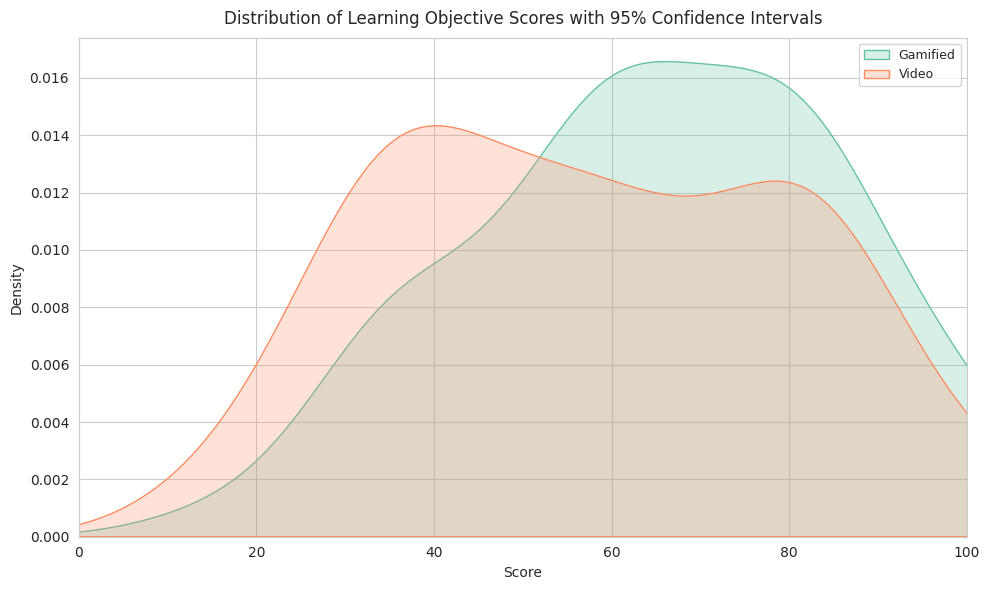

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for plotting by reshaping
G_Group_melted = G_Group.melt()
G_Group_melted['Group'] = 'Gamified'
V_Group_melted = V_Group.melt()
V_Group_melted['Group'] = 'Video'

combined_data = pd.concat([G_Group_melted, V_Group_melted])


plot_combined_distributions(data1=G_Group['LP_03_Lea'], data2=V_Group['LP_03_Lea'], x_cut_off=(0, 100))

### <a name="Q1.1"></a>Q1.1. Is There a Significant Difference in Objective Scores Between the Groups?

This research question aims to investigate whether the objective scores, which likely reflect participants’ performance or learning outcomes, differ significantly between the two groups under study. The objective scores may be derived from standardized assessments, quizzes, or other performance-based evaluations designed to measure specific learning outcomes.

#### <a name="Q1.1.1"></a>Q1.1.1 Normal Distribution & Variance Assumption Test

##### <a name="Q1.1.1.1"></a>Q1.1.1.1 Normality Test with Shapiro-Wilk Test

In [ ]:
# Normality Test
from scipy.stats import shapiro


stat_gam, p_gam = shapiro(G_Group['LP_03_Lea'])
stat_vid, p_vid = shapiro(V_Group['LP_03_Lea'])


print('Gamified Learning Group Data')
print('p-value: ', round(p_gam, 3), 'stat: ', stat_gam)

if p_gam < 0.05:
    print('The data is not normally distributed')
else:
    print('The data is normally distributed')

print('\n')

print('Video Learning Group Data')
print('p-value: ', round(p_vid, 3), 'stat: ', stat_vid)

if p_vid < 0.05:
    print('The data is not normally distributed')
else:
    print('The data is normally distributed')


Gamified Learning Group Data
p-value:  0.062 stat:  0.9589196259628611
The data is normally distributed


Video Learning Group Data
p-value:  0.005 stat:  0.9379203986255229
The data is not normally distributed


##### <a name="Q1.1.1.2"></a>Q1.1.1.2 Variance Test with Levene Test

In [ ]:
# Levene Test
from scipy.stats import levene

stat_levene, p_levene = levene(G_Group['LP_03_Lea'], V_Group['LP_03_Lea'])
print('p-value: ', round(p_levene, 3), 'stat: ', stat_levene)

if p_levene < 0.05:
    print('The variances are not equal')
else:
    print('The variances are equal')


p-value:  0.278 stat:  1.1904754519799967
The variances are equal


#### <a name="Q1.1.2"></a>Q1.1.2 Test for Mean Difference

##### <a name="Q1.1.2.1"></a> Q1.1.2.1 T-Test

According to the Shapiro-Wilk Test, the data is `normally distributed`. According to the Levene Test, `the variances are equal`. Therefore, we apply the `T-Test` to the objective score

$H_0$: The means of the two groups have no significant difference \
$H_1$: The means of the two groups have a significant difference

In [ ]:
# T-Test
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(G_Group['LP_03_Lea'], V_Group['LP_03_Lea'], equal_var=True)
print('t-stat: ', t_stat, 'p-value: ', p_value)

if p_value < 0.05:
    print('The means are significantly different')
else:
    print('The means are not significantly different')

t-stat:  1.849107704450843 p-value:  0.06710311620234057
The means are not significantly different


##### <a name="Q1.1.2.2"></a>Q1.1.2.2 Conclusion for Objective Score
According to the result of T-Test, the means of the two groups are not significantly different. This indicates that the gamified learning group does not have a significantly higher objective score of learning module than the video learning group.


##### <a name="Q1.1.2.3"></a>Q1.1.2.3 Population Estimation

Assume the sampling is simple random sampling, we can use the confidence interval to estimate the population mean.

Gamified Learning Group Data
Mean:  65.123 / Std:  20.417 / N:  54
95% Confidence Interval:  59.67697730848748 70.56820787669771
Video Learning Group Data
Mean:  57.626 / Std:  22.493 / N:  59
95% Confidence Interval:  51.887 63.366


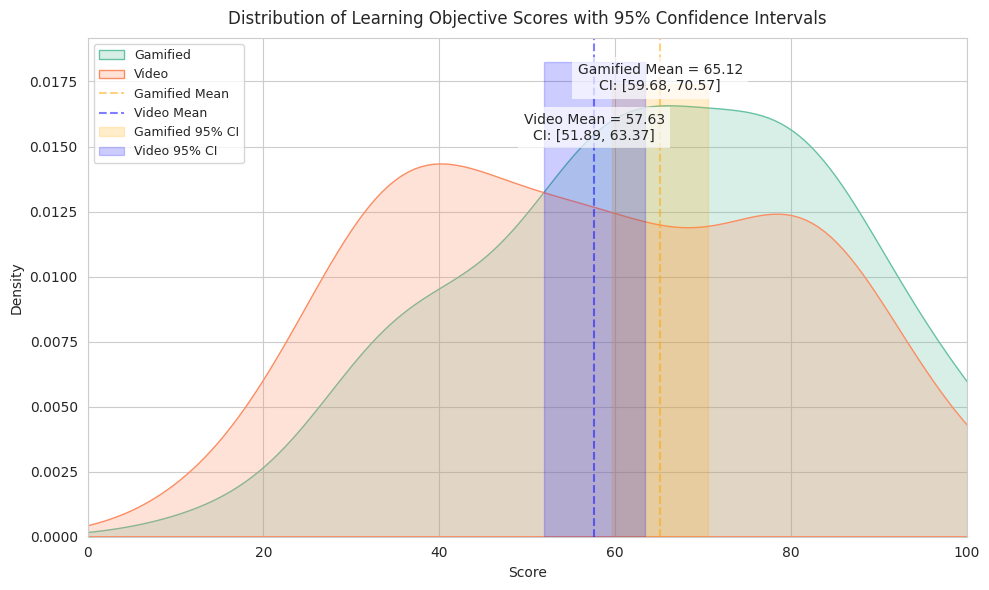

In [ ]:
import scipy.stats as stats
import numpy as np

confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

def confidence_interval(sample_mean, sample_std, n):
    margin_of_error = z_score * (sample_std / np.sqrt(n))
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    return lower_bound, upper_bound

G_Group_mean = G_Group['LP_03_Lea'].mean()
G_Group_std = G_Group['LP_03_Lea'].std()
G_Group_n = G_Group['LP_03_Lea'].count()

G_Group_lower, G_Group_upper = confidence_interval(G_Group_mean, G_Group_std, G_Group_n)

print('Gamified Learning Group Data')
print('Mean: ', round(G_Group_mean, 3), '/ Std: ', round(G_Group_std, 3), '/ N: ', G_Group_n)
print('95% Confidence Interval: ', G_Group_lower, G_Group_upper)


V_Group_mean = V_Group['LP_03_Lea'].mean()
V_Group_std = V_Group['LP_03_Lea'].std()
V_Group_n = V_Group['LP_03_Lea'].count()

V_Group_lower, V_Group_upper = confidence_interval(V_Group_mean, V_Group_std, V_Group_n)
print('Video Learning Group Data')
print('Mean: ', round(V_Group_mean, 3), '/ Std: ', round(V_Group_std, 3), '/ N: ', V_Group_n)
print('95% Confidence Interval: ', round(V_Group_lower, 3), round(V_Group_upper, 3))


plot_combined_distributions(
    G_Group['LP_03_Lea'], V_Group['LP_03_Lea'],
    G_Group_mean, G_Group_lower, G_Group_upper,
    V_Group_mean, V_Group_lower, V_Group_upper,
    x_cut_off=(0, 100)
)


#### <a name="Q1.1.3"></a>Q1.1.3 Conclusion for Objective Score
Although the mean of the two groups is different and the gamified group has a higher mean objective score, the confidence intervals of the two groups overlap. Therefore, we cannot reject the null hypothesis that the means of the two groups are equal.

---

### <a name="Q1.2"></a>Q1.2 Is there a statistically significant difference in perceptions after learning between the two groups?

To determine whether there is a statistically significant difference in perceptions after learning between the two groups, we need to conduct a proper statistical analysis that considers the nature of the data and the research context.

In this case, the data collected for learning performance is based on a `Likert scale`, which is commonly used to measure attitudes, perceptions, and opinions. Although Likert scale data is technically ordinal **(since the intervals between scale points may not be exactly equal)**, it is often treated as interval data when certain conditions are met, particularly when the scale has five or more points and the data distribution is approximately symmetrical.

Given this, we can proceed by calculating the mean scores for each group. These mean scores serve as a `latent variable`, representing an aggregated measure of each participant’s perception after learning. By comparing the mean scores of the two groups, we can assess whether there is a meaningful difference in their learning perceptions.

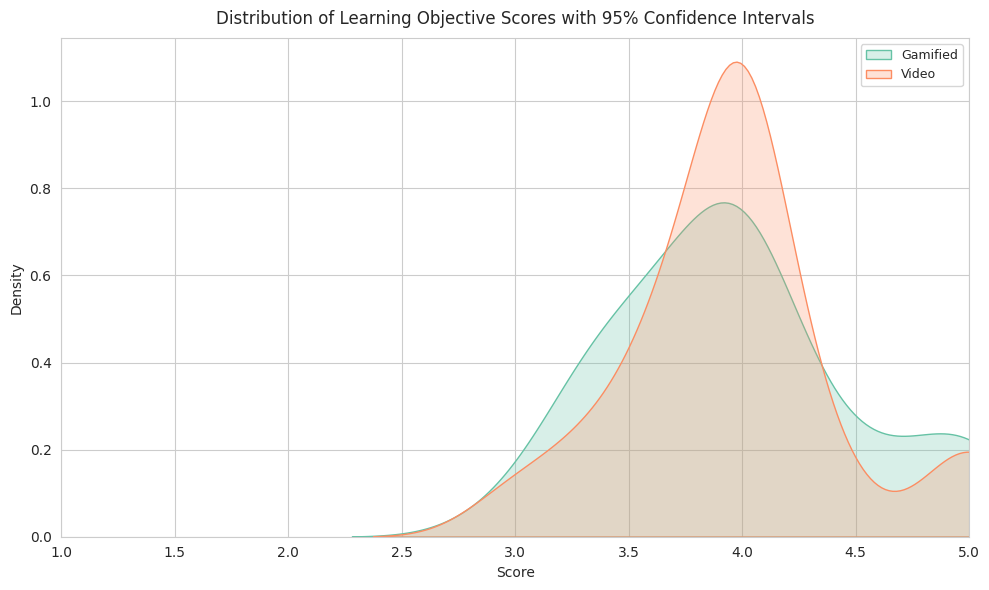

In [ ]:
G_Group_LP_latens = [np.mean(G_Group[['LP_04_Iha','LP_04_Ino','LP_04_The']].iloc[i].values) for i in range(len(G_Group))]
V_Group_LP_latens = [np.mean(V_Group[['LP_04_Iha','LP_04_Ino','LP_04_The']].iloc[i].values) for i in range(len(V_Group))]

plot_combined_distributions(
    G_Group_LP_latens, V_Group_LP_latens, x_cut_off=(1, 5)
)


In [ ]:
G_Group_LP_latens

[3.6666666666666665,
 3.0,
 4.0,
 5.0,
 4.333333333333333,
 3.3333333333333335,
 4.0,
 4.0,
 3.6666666666666665,
 4.0,
 3.6666666666666665,
 4.0,
 4.0,
 4.0,
 3.6666666666666665,
 4.0,
 4.0,
 3.6666666666666665,
 3.3333333333333335,
 4.666666666666667,
 3.6666666666666665,
 5.0,
 3.3333333333333335,
 4.0,
 4.0,
 3.6666666666666665,
 3.3333333333333335,
 3.0,
 4.666666666666667,
 4.0,
 4.333333333333333,
 4.666666666666667,
 3.3333333333333335,
 4.0,
 4.333333333333333,
 3.6666666666666665,
 3.3333333333333335,
 4.0,
 5.0,
 3.6666666666666665,
 4.333333333333333,
 3.3333333333333335,
 3.3333333333333335,
 4.333333333333333,
 4.0,
 5.0,
 5.0,
 3.6666666666666665,
 3.3333333333333335,
 5.0,
 4.0,
 4.0,
 4.0,
 3.6666666666666665]

#### <a name="Q1.2.1"></a>Q1.2.1 Normal Distribution & Variance Assumption Test

##### <a name="Q1.2.1.1"></a>Q1.2.1.1 Normality Test with Shapiro-Wilk Test

In [ ]:
stat_a, p_a = shapiro(G_Group_LP_latens)
stat_b, p_b = shapiro(V_Group_LP_latens)

print('Gamified Learning Group Data')
print('p-value: ', round(p_a, 3), 'stat: ', stat_a)

if p_a < 0.05:
    print('The data is not normally distributed')
else:
    print('The data is normally distributed')

print('\n')
print('Video Learning Group Data')
print('p-value: ', round(p_b, 3), 'stat: ', stat_b)
if p_b < 0.05:
    print('The data is not normally distributed')
else:
    print('The data is normally distributed')



Gamified Learning Group Data
p-value:  0.001 stat:  0.9181348376555996
The data is not normally distributed


Video Learning Group Data
p-value:  0.0 stat:  0.8660736134094184
The data is not normally distributed


##### <a name="Q1.2.1.2"></a>Q1.2.1.2 Variance Test with Levene Test

In [ ]:
stat_var, p_var = levene(G_Group_LP_latens, V_Group_LP_latens)
print('p-value: ', round(p_var, 3), 'stat: ', stat_var)

if p_var < 0.05:
    print('The variances are not equal')
else:
    print('The variances are equal')

p-value:  0.161 stat:  1.9883555203400367
The variances are equal


According to the result of Shapiro-Wilk Test, the data is not normally distributed. According to the result of Levene Test, the variances are equal. Therefore, we apply the `Mann-Whitney U Test` to the objective score between the two groups.

#### <a name="Q1.2.2"></a>Q1.2.2 Mann-Whitney U Test

The Mann-Whitney U Test is a non-parametric statistical test used to determine whether there is a significant difference between the distributions of two independent groups. It serves as an alternative to the independent samples t-test, especially when the data does not meet the assumptions of normality.



In [ ]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(G_Group_LP_latens, V_Group_LP_latens, alternative='two-sided')
print('p-value: ', round(p_value, 3), 'stat: ', stat)

if p_value < 0.05:
    print('The two groups have a significant difference')
else:
    print('The two groups do not have a significant difference')

p-value:  0.806 stat:  1551.5
The two groups do not have a significant difference


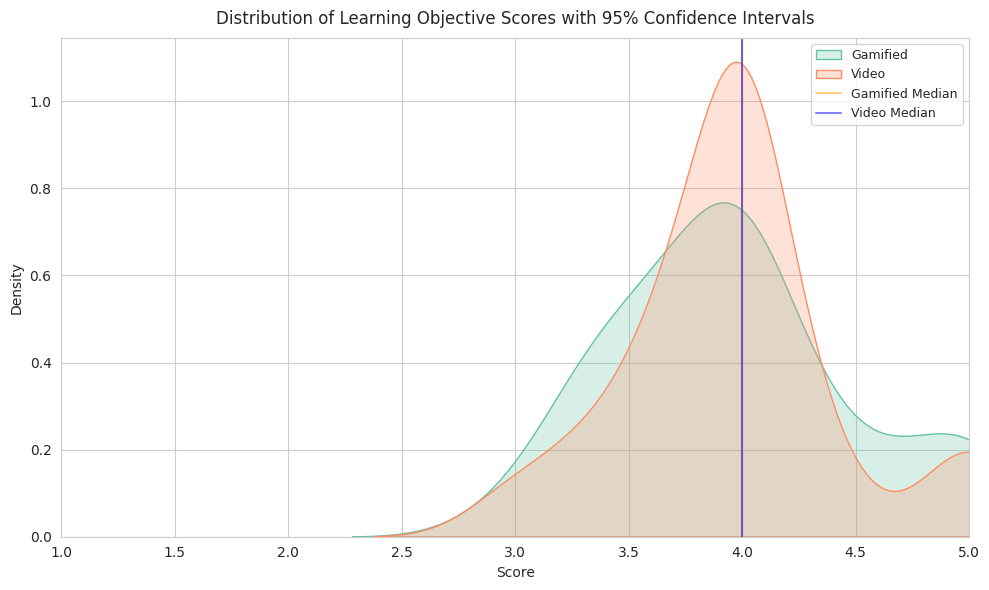

In [ ]:
plot_combined_distributions(
    G_Group_LP_latens, V_Group_LP_latens,
    median1=np.median(G_Group_LP_latens), median2=np.median(V_Group_LP_latens),
    x_cut_off=(1, 5)
)

#### <a name="Q1.2.3"></a>Q1.2.3 Conclusion of Perception after Learning Score

According to the result of Mann-Whitney U Test, the two groups do not have a significant difference in their learning perceptions. This indicates that the gamified learning group does not have a significantly higher learning perception on learning performace than the video learning group.

# <a name="Q2"></a>Q2 How does gamification affect users' learning motivation?

# <a name="Q3"></a>Q3 How does gamification affect users' interest and enjoyment?

# <a name="Q4"></a>Q4 Can we predict learning interest level based on motivation, learning type (video/gamified), and learning objective score?

# <a name="Q5"></a>Q5 What factors affect the effectiveness of gamification (i.e., age, gender, country, level of education, confidence with technology, etc.)?

# <a name="conclusion_discussion"></a>Conclusion & Discussion

# <a name="task_division"></a>Task Division & Group Collaboration

# <a name="references"></a>References